In [ ]:
# Gender: M(male), F(female)
# Age: Age of the patient
# Smoking: YES=2 , NO=1.
# Yellow fingers: YES=2 , NO=1.
# Anxiety: YES=2 , NO=1.
# Peer_pressure: YES=2 , NO=1.
# Chronic Disease: YES=2 , NO=1.
# Fatigue: YES=2 , NO=1.
# Allergy: YES=2 , NO=1.
# Wheezing: YES=2 , NO=1.
# Alcohol: YES=2 , NO=1.
# Coughing: YES=2 , NO=1.
# Shortness of Breath: YES=2 , NO=1.
# Swallowing Difficulty: YES=2 , NO=1.
# Chest pain: YES=2 , NO=1.
# Lung Cancer: YES , NO.

# Exploratory Data Analysis (EDA) is a great approach to understand your lung cancer data better. Here are some key questions to guide your EDA:

# 1. Demographic Analysis
# What is the gender distribution of lung cancer patients?
# What is the age distribution of lung cancer patients?
# Is there a relationship between age or gender and the likelihood of lung cancer?
# 2. Risk Factor Analysis
# How many patients are smokers, and what is the prevalence of lung cancer among smokers vs. non-smokers?
# What percentage of patients with yellow fingers have lung cancer?
# How do other risk factors (chronic disease, anxiety, alcohol consumption, etc.) relate to lung cancer?
# 3. Symptom Analysis
# What symptoms (coughing, wheezing, chest pain, shortness of breath) are most common among lung cancer patients?
# Are there certain symptoms that are more prevalent among patients with lung cancer compared to those without?
# How many lung cancer patients exhibit multiple symptoms simultaneously?
# 4. Co-occurrence of Symptoms and Risk Factors
# Are there any combinations of symptoms and risk factors that are highly associated with lung cancer?
# For instance, is there a high prevalence of lung cancer among patients who smoke and experience shortness of breath or chest pain?
# 5. Statistical Testing
# Perform statistical tests to see if certain factors (e.g., smoking, chronic disease, anxiety) are significantly associated with lung cancer.
# Does gender, age, or any specific symptom significantly impact the likelihood of lung cancer?
# 6. Comparative Analysis
# Compare characteristics (symptoms, risk factors) between lung cancer patients and non-lung cancer patients.
# Are there significant differences in lifestyle factors (smoking, alcohol) between the two groups?
# 7. Correlation Analysis
# Is there a correlation between any of the symptoms or risk factors?
# Do symptoms like wheezing and shortness of breath correlate with each other?
# Does smoking correlate with other factors like yellow fingers or chronic disease?
# 8. Prediction-Oriented Analysis
# Which factors appear most predictive of lung cancer in this dataset?
# Can you identify which symptoms or risk factors might be early indicators for lung cancer?
# 9. Visualizations
# Create visualizations (bar charts, box plots, heatmaps) to visualize relationships between variables, such as smoking and lung cancer or age distribution across lung cancer status.
# Use a heatmap to show correlations between symptoms, risk factors, and lung cancer.
# 10. Cluster Analysis
# Can you cluster patients based on symptoms and risk factors?
# Do any clusters show a higher prevalence of lung cancer?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lung-cancer-data.csv')

In [3]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [153]:
unique_gender = df['GENDER'].value_counts()

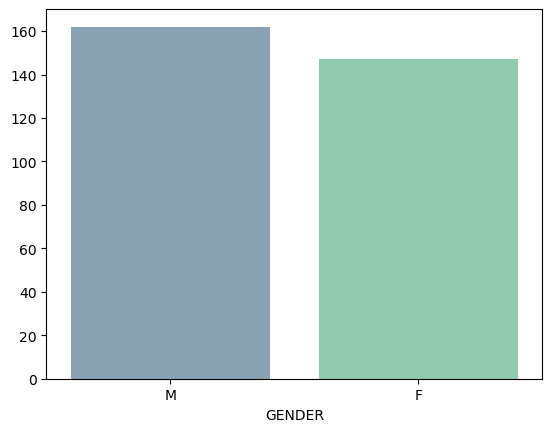

In [28]:
sns.barplot(x=unique_gender.index, y = unique_gender.values, hue=unique_gender.index,palette="viridis", alpha=0.6)
plt.show()

### THE ABOVE BAR PLOT SHOWS THAT MALES ARE MORE EFFECTED BY LUNG CANCER THAN FEMALES

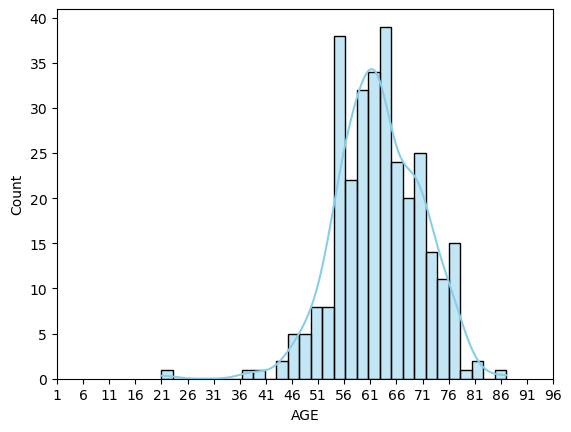

In [52]:
sns.histplot(df['AGE'], bins=30, kde=True, color="skyblue")
plt.xticks(ticks=range(1, 100 + 1, 5))
plt.show()

### THE HISTOGRAM SHOWS THAT AGES BETWEEN 46 AND 80 ARE MOSTLY EFFECTED BY LUNG CANCER AND 

In [60]:
unique_val = df['SMOKING'].value_counts()
unique_val_labels = ["Smokers" , "Non Smokers"]

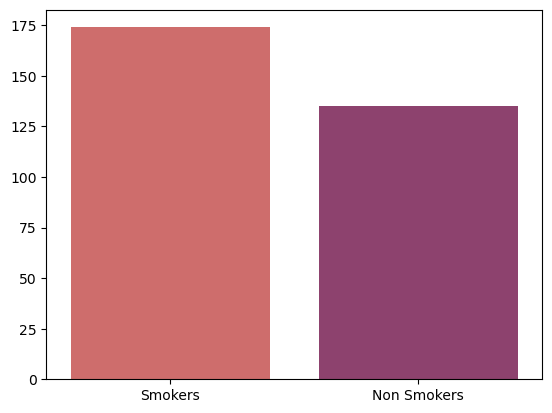

In [68]:
sns.barplot(x=unique_val_labels, y = unique_val.values, hue=unique_val_labels,palette="flare")
plt.show()

In [112]:
no_of_yellow_finger_patients = df['YELLOW_FINGERS'].value_counts()[2]
total_patients = df.shape[0]

list_for_pie_chart=[no_of_yellow_finger_patients, total_patients - no_of_yellow_finger_patients]
labels_for_pie_chart=["Patients with yellow fingers", "Patients without yellow fingers"]

In [110]:
pct = no_of_yellow_finger_patients / total_patients * 100
pct.round(2)

56.96

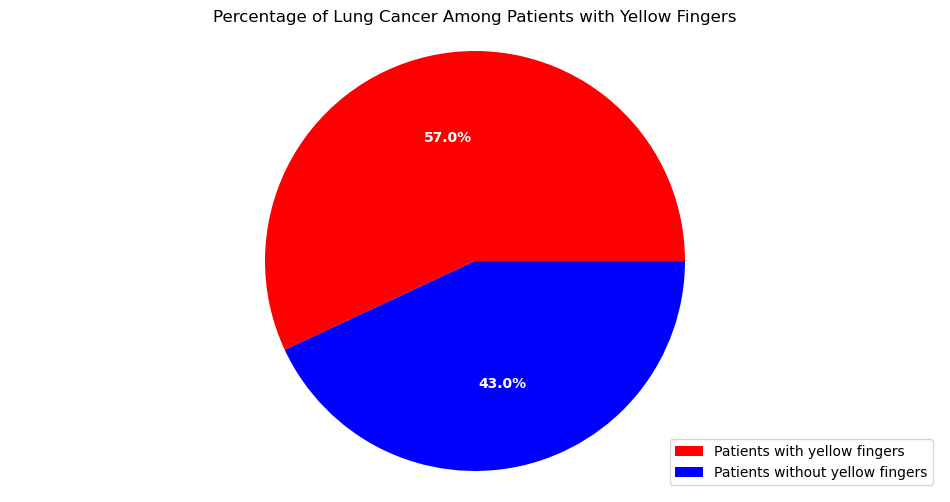

In [137]:
plt.figure(figsize=(12,6))
plt.pie(x = list_for_pie_chart,colors = ['#FF0000','#0000FF'],autopct='%1.1f%%', textprops={'color': 'white', 'weight': 'bold'})
plt.legend(labels = labels_for_pie_chart, loc="lower right")
plt.axis('equal') 
plt.title("Percentage of Lung Cancer Among Patients with Yellow Fingers")
plt.show()

### THE ABOVE PIE CHART SHOWS THAT MOST OF THE PATIENTS HAVE YELLOW FINGERS

In [157]:
df['CHRONIC DISEASE'][df['CHRONIC DISEASE'] == 1] 

0      1
2      1
3      1
4      1
6      1
      ..
302    1
305    1
306    1
307    1
308    1
Name: CHRONIC DISEASE, Length: 153, dtype: int64

In [158]:
df['CHRONIC DISEASE'][df['CHRONIC DISEASE'] == 2] 

1      2
5      2
9      2
10     2
11     2
      ..
295    2
297    2
300    2
303    2
304    2
Name: CHRONIC DISEASE, Length: 156, dtype: int64

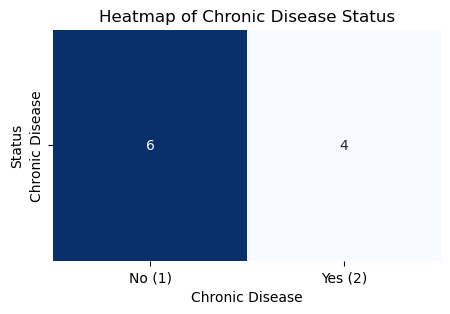